In [36]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.5 MB/s eta 0:00:00a 0:00:01


In [37]:
import pandas as pd
import numpy as np
from sklearn import decomposition, preprocessing, cluster, tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
#handy reference to file paths

files = {
    "peptides":"PD-datasets/train_peptides.csv",
    "proteins":"PD-datasets/train_proteins.csv",
    "clinical":"PD-datasets/train_clinical_data.csv"
}

In [3]:
#create dataframes from csv files

peptides = pd.read_csv("PD-datasets/train_peptides.csv")
proteins = pd.read_csv("PD-datasets/train_proteins.csv")
clinical = pd.read_csv("PD-datasets/train_clinical_data.csv")

In [4]:
#reference to df columns
peptides.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'Peptide',
       'PeptideAbundance'],
      dtype='object')

In [5]:
#inspect dtypes
peptides.dtypes

visit_id             object
visit_month           int64
patient_id            int64
UniProt              object
Peptide              object
PeptideAbundance    float64
dtype: object

In [6]:
#use encoding to transform objects into numeric values

le = LabelEncoder()
encoded_peptides = peptides[peptides.columns[3:5]].apply(le.fit_transform)
encoded_peptides.head()

,UniProt,Peptide
0,0,592
1,1,301
2,1,364
3,1,433
4,1,744


In [7]:
#replace objects in original dataframe
peptides[["UniProt","Peptide"]] = encoded_peptides[["UniProt","Peptide"]]
peptides.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,0,592,11254.3
1,55_0,0,55,1,301,102060.0
2,55_0,0,55,1,364,174185.0
3,55_0,0,55,1,433,27278.9
4,55_0,0,55,1,744,30838.7


In [8]:
#repeat the process with the other dataframes
proteins.columns

Index(['visit_id', 'visit_month', 'patient_id', 'UniProt', 'NPX'], dtype='object')

In [9]:
proteins.dtypes

visit_id        object
visit_month      int64
patient_id       int64
UniProt         object
NPX            float64
dtype: object

In [10]:
encoded_proteins = proteins[proteins.columns[3:4]].apply(le.fit_transform)
encoded_proteins.value_counts()

UniProt
85         1113
68         1113
24         1113
26         1113
27         1113
           ... 
194         661
38          654
193         616
214         606
213         489
Length: 227, dtype: int64

In [11]:
#check that we are encoding correctly
proteins["UniProt"].value_counts()

P01024    1113
P05090    1113
P01011    1113
P01023    1113
Q92520    1113
          ... 
Q6UX71     661
P01780     654
Q562R1     616
Q99832     606
Q99829     489
Name: UniProt, Length: 227, dtype: int64

In [12]:
proteins[["UniProt"]] = encoded_proteins[["UniProt"]]
proteins.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,0,11254.3
1,55_0,0,55,1,732430.0
2,55_0,0,55,2,39585.8
3,55_0,0,55,3,41526.9
4,55_0,0,55,4,31238.0


In [13]:
clinical.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [14]:
clinical.dtypes

visit_id                                object
patient_id                               int64
visit_month                              int64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [15]:
encoded_clinical = clinical[clinical.columns[7:8]].apply(le.fit_transform)
clinical["upd23b_clinical_state_on_medication"] = encoded_clinical["upd23b_clinical_state_on_medication"]
clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,2
1,55_3,55,3,10.0,7.0,25.0,NaN,2
2,55_6,55,6,8.0,10.0,34.0,NaN,2
3,55_9,55,9,8.0,9.0,30.0,0.0,1
4,55_12,55,12,10.0,10.0,41.0,0.0,1


In [16]:
#join dataframes 

peptides_clinical = peptides.merge(clinical,how = "left", on=['visit_id', 'visit_month', 'patient_id'])
merge_df = peptides_clinical.merge(proteins,on=['visit_id', 'visit_month', 'patient_id'])

In [17]:
peptides_clinical.shape

(981834, 11)

In [18]:
merge_df.shape

(206138191, 13)

In [19]:
merge_df.head(20)

,visit_id,visit_month,patient_id,UniProt_x,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt_y,NPX
0,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,0,11254.30
1,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,1,732430.00
2,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,2,39585.80
3,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,3,41526.90
4,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,4,31238.00
5,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,5,4202.71
6,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,6,177775.00
7,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,7,62898.20
8,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,8,333376.00
9,55_0,0,55,0,592,11254.3,10.0,6.0,15.0,NaN,2.0,9,166850.00


In [21]:
# for i in merge_df.columns:
#     print(merge_df[i].value_counts())

In [41]:
sample = merge_df.sample(20000)

In [52]:
sample = sample.dropna()

In [53]:
# PCA

X = sample
std = preprocessing.StandardScaler()
X_std = pd.DataFrame(std.fit_transform(X), columns=X.columns)
X_std

,visit_id,visit_month,patient_id,UniProt_x,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication,UniProt_y,NPX
0,0.349002,0.127381,0.485563,-0.898357,1.051204,-0.154171,-1.236282,-1.312603,-1.344864,-0.624787,1.535475,1.008882,-0.118714
1,-0.072849,0.684894,-0.218201,1.035436,-1.351653,-0.177904,-1.236282,0.183709,-0.875829,-0.624787,0.231403,0.671082,-0.011218
2,-0.846162,0.684894,-1.508289,1.603156,-1.280245,-0.135390,2.976468,2.511303,1.469349,-0.624787,-1.072668,-0.695469,14.034464
3,-0.012582,-0.987644,-0.117640,-1.128993,0.280005,-0.164595,-0.358626,-0.647575,-0.004763,-0.624787,1.535475,0.087611,-0.123289
4,0.794336,-0.987644,1.228508,0.396752,0.769145,-0.174245,-1.411813,-0.647575,-0.071768,-0.624787,1.535475,-0.634051,-0.127103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,0.758682,-0.987644,1.169029,-0.366121,-1.383786,-0.170284,0.870093,1.347506,0.531278,2.269806,0.231403,-0.695469,11.802525
9999,-0.800428,0.127381,-1.431986,2.046686,0.961945,-0.172731,0.167968,0.183709,0.732293,-0.624787,-1.072668,0.348638,-0.107973
10000,-0.012574,0.127381,-0.117640,1.390261,-0.387654,-0.177179,-1.060751,-0.481319,0.330263,-0.624787,1.535475,0.763209,-0.125739
10001,-0.148913,-0.430131,-0.345082,1.833791,-1.655134,-0.159126,-0.358626,-0.813832,-0.741818,-0.624787,0.231403,1.193136,-0.121386


In [54]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(X_std), columns=[f'PC{i+1}' for i in range(len(X.columns))])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-2.634500,0.607202,1.019793,0.639074,-0.884929,-0.558065,0.715793,-0.104418,-0.757967,0.228538,0.300470,-0.222552,0.086989
1,-1.035689,0.101650,-0.400351,-1.822848,0.139410,0.700004,0.324493,-0.299143,-0.438959,0.129309,0.160726,-0.235741,1.056063
2,3.734690,-1.902589,-2.539072,1.589944,10.000564,1.850789,9.365667,0.855424,0.421319,1.698199,-1.573161,0.199776,0.021254
3,-1.486028,-0.337423,0.131833,1.050382,-0.454646,-0.359536,0.036864,-0.613557,0.303116,0.866462,0.662491,0.171435,-0.470054
4,-1.995668,1.164776,-0.461094,0.650343,0.021581,-0.681198,-0.357353,0.867293,0.561429,0.484209,1.239912,-0.269343,-0.003223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,1.823888,0.461782,-3.485789,4.099845,7.466142,1.520192,7.812775,-0.330310,-0.159131,-0.734908,0.657480,0.053542,0.369939
9999,0.767816,-1.306238,0.469606,-1.867725,0.145439,-0.468203,0.286042,1.745949,0.696267,0.022964,-0.299212,0.343176,-0.236913
10000,-1.319325,0.018165,-0.499263,-1.336816,-0.352055,0.236401,0.490398,0.589502,-0.204159,0.856152,1.206424,-0.336833,-0.261301
10001,-1.342000,-0.185464,-1.314971,-2.073712,-0.503071,0.940383,0.658098,0.048983,0.157591,-0.053221,-0.322247,0.309023,-0.112270


In [45]:
pca.components_[0]

array([ 4.24732457e-02,  2.15120467e-01, -4.10689218e-02,  2.60722504e-03,
        9.87692243e-03, -3.54113616e-04,  4.47564904e-01,  5.21012111e-01,
        4.77765788e-01,  3.38599574e-01, -3.67933136e-01, -8.24878688e-03,
        2.73089429e-03])

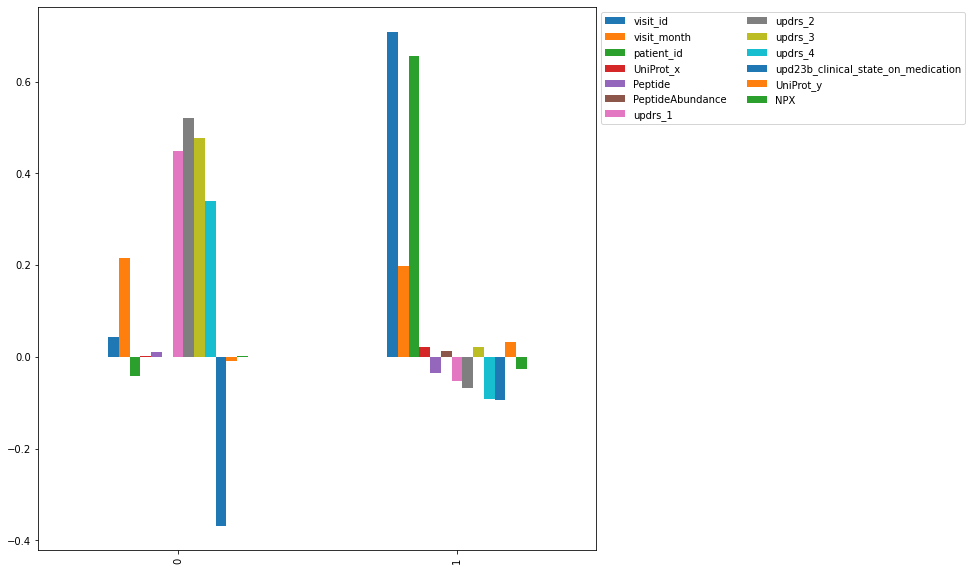

In [55]:
(pd.DataFrame(pca.components_, columns=X.columns)
.iloc[:2]
 .plot.bar(figsize=(10,10))
 .legend(ncol=(2),bbox_to_anchor=(1,1)))

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

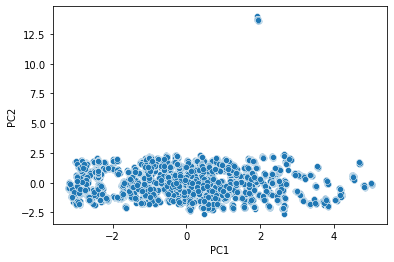

In [56]:
sns.scatterplot(x='PC1',y='PC2',
                data=pca_X)

In [57]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = sample["updrs_3"].values.reshape(-1,1)

# Separate the X variable, the features
Z = sample.copy()
Z.drop("updrs_3",axis=1, inplace=True)

In [58]:
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, random_state=1, stratify=y)
y_train.shape

(7502, 1)

In [59]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr_model.fit(Z_train, y_train)

/Users/oaklandsveryown/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oaklandsveryown/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [60]:
lr_testing_predictions = lr_model.predict(Z_test)

In [62]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
# target_names = ["Healthy Loan", "High-Risk Loan"]
print(classification_report(y_test,lr_testing_predictions))

              precision    recall  f1-score   support

         0.0       0.07      0.99      0.14       184
         1.0       0.00      0.00      0.00        52
         2.0       0.00      0.00      0.00        45
         3.0       0.00      0.00      0.00        30
         4.0       0.00      0.00      0.00        28
         5.0       0.00      0.00      0.00        22
         6.0       0.00      0.00      0.00        25
         7.0       0.00      0.00      0.00        21
         8.0       0.00      0.00      0.00        22
         9.0       0.00      0.00      0.00        48
        10.0       0.00      0.00      0.00        61
        11.0       0.00      0.00      0.00        67
        12.0       0.00      0.00      0.00        34
        13.0       0.00      0.00      0.00        51
        14.0       0.00      0.00      0.00        54
        15.0       0.00      0.00      0.00        72
        16.0       0.00      0.00      0.00        55
        17.0       0.00    

/Users/oaklandsveryown/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oaklandsveryown/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/oaklandsveryown/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [65]:
merge_df['updrs_1']

0            10.0
1            10.0
2            10.0
3            10.0
4            10.0
             ... 
206138186     6.0
206138187     6.0
206138188     6.0
206138189     6.0
206138190     6.0
Name: updrs_1, Length: 206138191, dtype: float64

In [ ]:
for i in merge_df['updrs_1']:
    if i > 22:
        merge_df.at[i, 'ifor'] = 1
    else:
        merge_df.at[i, 'ifor'] = 0

Part I: Nonmotor experiences of daily living: 13 items. Score range: 0–52,[8] 10 and below is mild, 22 and above is severe.[9]
Part II: Motor experiences of daily living: 13 items. Score range: 0–52,[8] 12 and below is mild, 30 and above is severe.[9]
Part III: Motor examination: 18 items. Score range: 0–132,[8] 32 and below is mild, 59 and above is severe.[9]
Part IV: Motor complications: 6 items. Score range: 0–24,[8] 4 and below is mild, 13 and above is severe.[9]

In [ ]:
d = {**dict.fromkeys((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,13, 14, 15, 16, 17, 18, 19, 20, 21), 0),
     **dict.fromkeys((22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,35, 36, 37, 38, 39, 40, 41, 42, 43), 1)}
# merge_df['updrs_1'] = merge_df['updrs_1'].map(d)
d

In [ ]:
merge_df['updrs_1'].unique()